<a href="https://colab.research.google.com/github/thuyd12/tiller_order-analysis/blob/main/Tiller_by_Sum_Up_Shops_orders_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 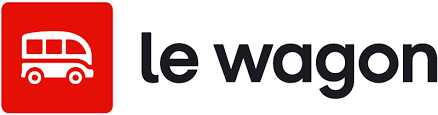

# Shop orders analysis

a) Upload [order_data](https://drive.google.com/file/d/1dVuD1hB3UnX5xhCHFMQ5R4iBdMdJMK4a/view?usp=sharing) in Colab and load it in a DataFrame `df_order`

In [ ]:
df_order = pd.read_csv("Tiller_order_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


b) What does a row represent? What information can you find?

A line corresponds to a command. 
One can find for example : 
- the brand name associated with this order
- the opening and closing time of the order
- The number of customers associated with this order
- The amount of the order
- the amount of the order, etc.

c) What are the different statuses of an order? How many orders are there per status?

In [ ]:
print(df_order["dim_status"].unique())

print(df_order.groupby(["dim_status"], as_index=False).size())

['CLOSED' 'IN_PROGRESS']
    dim_status    size
0       CLOSED  116939
1  IN_PROGRESS     365


d) What is the proportion of orders with a CLOSE status?

In [ ]:
mask_order_close = df_order["dim_status"] == "CLOSED"

print(df_order[mask_order_close].shape[0] / df_order.shape[0])

0.9968884266521175


e) How many restaurants are there? What are their ids?

In [ ]:
stores = df_order["id_store"].unique()

print(stores)
print(len(stores))

[8052 8347 8283 9084 4337  360 1796 7965 6293 4542]
10


f) Calculate the turnover per restaurant. Which restaurant has the highest turnover?

In [ ]:
df_order.groupby(["id_store"])["m_cached_payed"].sum().sort_values(ascending=False)

id_store
7965    1138690.95
4337     865357.89
9084     479019.75
360      387089.14
8283     369822.82
6293     359471.00
8052     327758.85
1796     321099.69
4542     243728.69
8347         23.00
Name: m_cached_payed, dtype: float64

g) Count the number of orders per restaurant. Which restaurant had the most orders in this data? Is it the same as the one with the highest turnover?




In [ ]:
df_order.groupby(["id_store"]).size().sort_values(ascending=False)

id_store
1796    27349
4337    20003
4542    17641
6293    16103
8283    10023
7965     9091
9084     7804
8052     4906
360      4383
8347        1
dtype: int64

h) Calculate the average price of an order for each restaurant. Do you think you are facing the same types of restaurants?

In [ ]:
df_turnover = df_order.groupby(["id_store"])["m_cached_price"].agg(['size', 'sum']).reset_index()
df_turnover["avg_order_price"] = df_turnover["sum"] / df_turnover["size"]
df_turnover.sort_values("avg_order_price", ascending=False)

,id_store,size,sum,avg_order_price
5,7965,9091,1138585.95,125.243202
0,360,4383,386934.14,88.280662
6,8052,4906,327758.85,66.807756
9,9084,7804,479040.75,61.384002
2,4337,20003,865847.30,43.285872
7,8283,10023,369822.82,36.897418
8,8347,1,23.00,23.000000
4,6293,16103,359718.00,22.338570
3,4542,17641,243789.69,13.819494
1,1796,27349,321099.69,11.740820


i) The problem is that an order may be placed for several people. Instead, we want to know the average price spent by a single person in the restaurant.

Add a column to the initial dataframe,  representing the price of the order per customer

In [ ]:
df_order["price_per_customer"] = df_order["m_cached_payed"] / df_order["m_nb_customer"]
df_order.head()

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price,price_per_customer
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17 UTC,2019-01-12 19:58:38 UTC,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5,45.50
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09 UTC,2019-01-16 22:10:50 UTC,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8,24.90
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46 UTC,2019-01-12 19:50:32 UTC,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4,27.40
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12 UTC,2019-01-24 21:58:59 UTC,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0,20.00
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06 UTC,2019-01-12 19:21:03 UTC,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9,19.95


j) Using the previous column, calculate the average price spent by each person in each of the restaurants.

In [ ]:
df_order.groupby(["id_store"])["price_per_customer"].mean()

id_store
360           NaN
1796          NaN
4337          NaN
4542    13.816036
6293          NaN
7965          NaN
8052    16.698658
8283    36.897418
8347    11.500000
9084          NaN
Name: price_per_customer, dtype: float64

k) It seems that there are data problems because for some restaurants the average price is lower than for others.

Do you have any idea why?

Fill the 0 values in the m_nb_customer column with 1 and then delete the rows where the m_cached_price column is 0

In [ ]:
df_order.loc[df_order.m_nb_customer == 0, "m_nb_customer"] = 1
df_order = df_order[df_order["m_cached_payed"] > 0]


l) Recalculate the price_per_customer column and the average price spent by each person in each restaurant.

In [ ]:
df_order["price_per_customer"] = df_order["m_cached_payed"] / df_order["m_nb_customer"]

df_order.groupby(["id_store"])["price_per_customer"].mean()

id_store
360      32.081429
1796     11.832542
4337     43.353690
4542     13.819953
6293     16.806272
7965    102.439694
8052     16.722518
8283     36.901100
8347     11.500000
9084     30.571901
Name: price_per_customer, dtype: float64

### Adding info

Restaurant 7965 has a higher price per person than the rest. Let's look at the time spent at the table to see if it can match a fancy restaurant.

m) Convert the date_opened and date_closed columns to datetime format

In [ ]:
df_order.date_closed = pd.to_datetime(df_order.date_closed)
df_order.date_opened = pd.to_datetime(df_order.date_opened)

n) Run the code below to calculate the time between the opening and closing date of an order in minutes.

In [ ]:
df_order["order_duration"] = (df_order.date_closed - df_order.date_opened).dt.total_seconds() / 60


o) Calculate the average time at table for each restaurant.

In [ ]:
df_order.groupby(["id_store"])["order_duration"].mean()

id_store
360      96.262090
1796      3.399033
4337      6.251355
4542      1.893868
6293     29.594241
7965     53.715114
8052    164.739022
8283      2.005228
8347      3.900000
9084    103.025325
Name: order_duration, dtype: float64

Some restaurants have very short average order times. It seems that there are fast food restaurants among them.

### Joins operations

p) Download data [order_line](https://drive.google.com/file/d/1KSDFGLu2QAAR2C5SUlM5mfhINHU-LIuJ/view?usp=sharing) and [store_data](https://drive.google.com/file/d/1W032PaySL7gouyX3bEKgndtm6qVta7Qp/view?usp=sharing) and upload them in two DataFrame `df_line` and `df_store`.

In [ ]:
df_line = pd.read_csv("Tiller_order_line.csv")
df_store = pd.read_csv("Tiller_store_data.csv")

q) What new information do you have access to through this data?

In [ ]:
df_line.head()

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,m_nb_payed,dim_feature_type,dim_unit_measure,dim_unit_measure_display
0,626609716,139058632.0,2020-08-25 17:27:14 UTC,2020-08-25 17:27:25 UTC,1.0,15.00,12.500000,15.00,12.500000,0.200,0.0,PRODUCT,VINS ROUGES,TWIST AGAIN 2018 VDF - YOANN ROMAGNE,DONE,0.0,NaN,UNIT,UNIT
1,403167240,94770355.0,2019-09-27 07:47:14 UTC,2019-09-27 07:47:18 UTC,1.0,25.90,21.583333,25.90,21.583333,0.200,0.0,PRODUCT,LIQUIDES 50ML AUTRES,MOMMY CAKE,DONE,0.0,NaN,UNIT,UNIT
2,578564178,127794604.0,2020-06-12 11:07:09 UTC,2020-06-12 11:07:25 UTC,1.0,4.20,3.818182,4.20,3.818182,0.100,0.0,PRODUCT,Déjeuner,FORMULE JUS 30CL,DONE,0.0,NaN,UNIT,UNIT
3,329942564,77841193.0,2019-06-17 13:13:30 UTC,2019-06-17 13:13:43 UTC,1.0,2.20,2.085308,2.20,2.085308,0.055,0.0,PRODUCT,BOISSONS,EVIAN - BADOIT - COCA,DONE,0.0,NaN,UNIT,UNIT
4,348375251,82283609.0,2019-07-12 20:14:51 UTC,2019-07-12 20:15:38 UTC,1.0,-5.16,-5.160000,-5.16,-5.160000,0.000,0.0,DISCOUNT,VARIOUS,DISCOUNT,DONE,0.0,NaN,NaN,NaN


In [ ]:
df_store.head()

,id_store,date_created,dim_zipcode,dim_country,dim_currency
0,2576,2016-07-12 16:15:31+00:00,34120,FR,EUR
1,2538,2016-07-07 16:35:44+00:00,47800,FR,EUR
2,2468,2016-06-30 12:44:25+00:00,06470,FR,EUR
3,2375,2016-06-21 12:52:36+00:00,76000,FR,EUR
4,2328,2016-06-16 13:59:52+00:00,75018,FR,EUR


- Order line: The different products in an order
- Store data : Information about the restaurant/bar

r) How many orders were placed in the 2nd arrondissement of Paris?

In [ ]:
df_order_w_store_info = df_order.merge(df_store, on="id_store")

mask = df_order_w_store_info.dim_zipcode == "75002"
df_order_w_store_info[mask].shape[0]

59357

s) Let's take the restaurant 4542. Its average ordering time was very short. 

Display the most ordered items in this restaurant. To do this, keep only the id_store and id_order columns from df_order and the id_order, id_order_line and dim_name columns from order_line.

Note that the dim_name column exists in both df_order and df_line.

In [ ]:
df_all = df_order[["id_order", "id_store"]].merge(df_line[["id_order", "id_order_line", "dim_name", "dim_category"]], on="id_order")

df_all[df_all.id_store == 4542].groupby(["dim_name"]).size().sort_values(ascending=False).head(30)


dim_name
divers                       41
Chorizo « Ospital »          26
Confiture cerises noires     12
Txirula « Ospital »          12
Saucisson « Ospital »        12
Boudin « Parra »             10
Lodève                        9
Chorizo Cular « Ospital »     8
Boudin Basque                 7
foie gras                     6
Confiture A.Rozés             6
Piment d’Espelette            6
Guindillas d’Ibarra           4
Guindilla grand bocal         3
boudin                        2
Divers                        2
dives                         1
confiture                     1
Boudin                        1
Les 2 Vaches                  1
Paté                          1
Guindillas 700g               1
Cassoulet au Canard           1
piquillos                     1
dtype: int64

Is it a fast food ? It's more a charcuterie